In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
%matplotlib inline
tau_table = pd.read_csv("tau.csv")
tau_table.head()
auc_table = tau_table[["dataset", "tau", "auc"]]
# auc_table

In [2]:
table = pd.pivot_table(auc_table, values='auc', index=['tau'], columns=['dataset'], aggfunc=np.max)
a = table.reset_index()
tau_list = []
data_list = []
auc_list = []
for dataset in ['Cora', "Citeseer" , "Pubmed", "ACM", "ogbn-arxiv"]:
    tau_list.extend(list(a['tau']))
    data_list.extend([dataset]*len(a))
    auc_list.extend(list(a[dataset]))

final_table = pd.DataFrame({
    "dataset":data_list,
    "tau":tau_list,
    "auc":auc_list
})
final_table.head()
# palette = sns.cubehelix_palette(light=.7, n_colors=6)
tau = a['tau']
cora_res = a["Cora"]
ogb_res = a["ogbn-arxiv"]
pub_res = a["Pubmed"]
acm_res = a["ACM"]


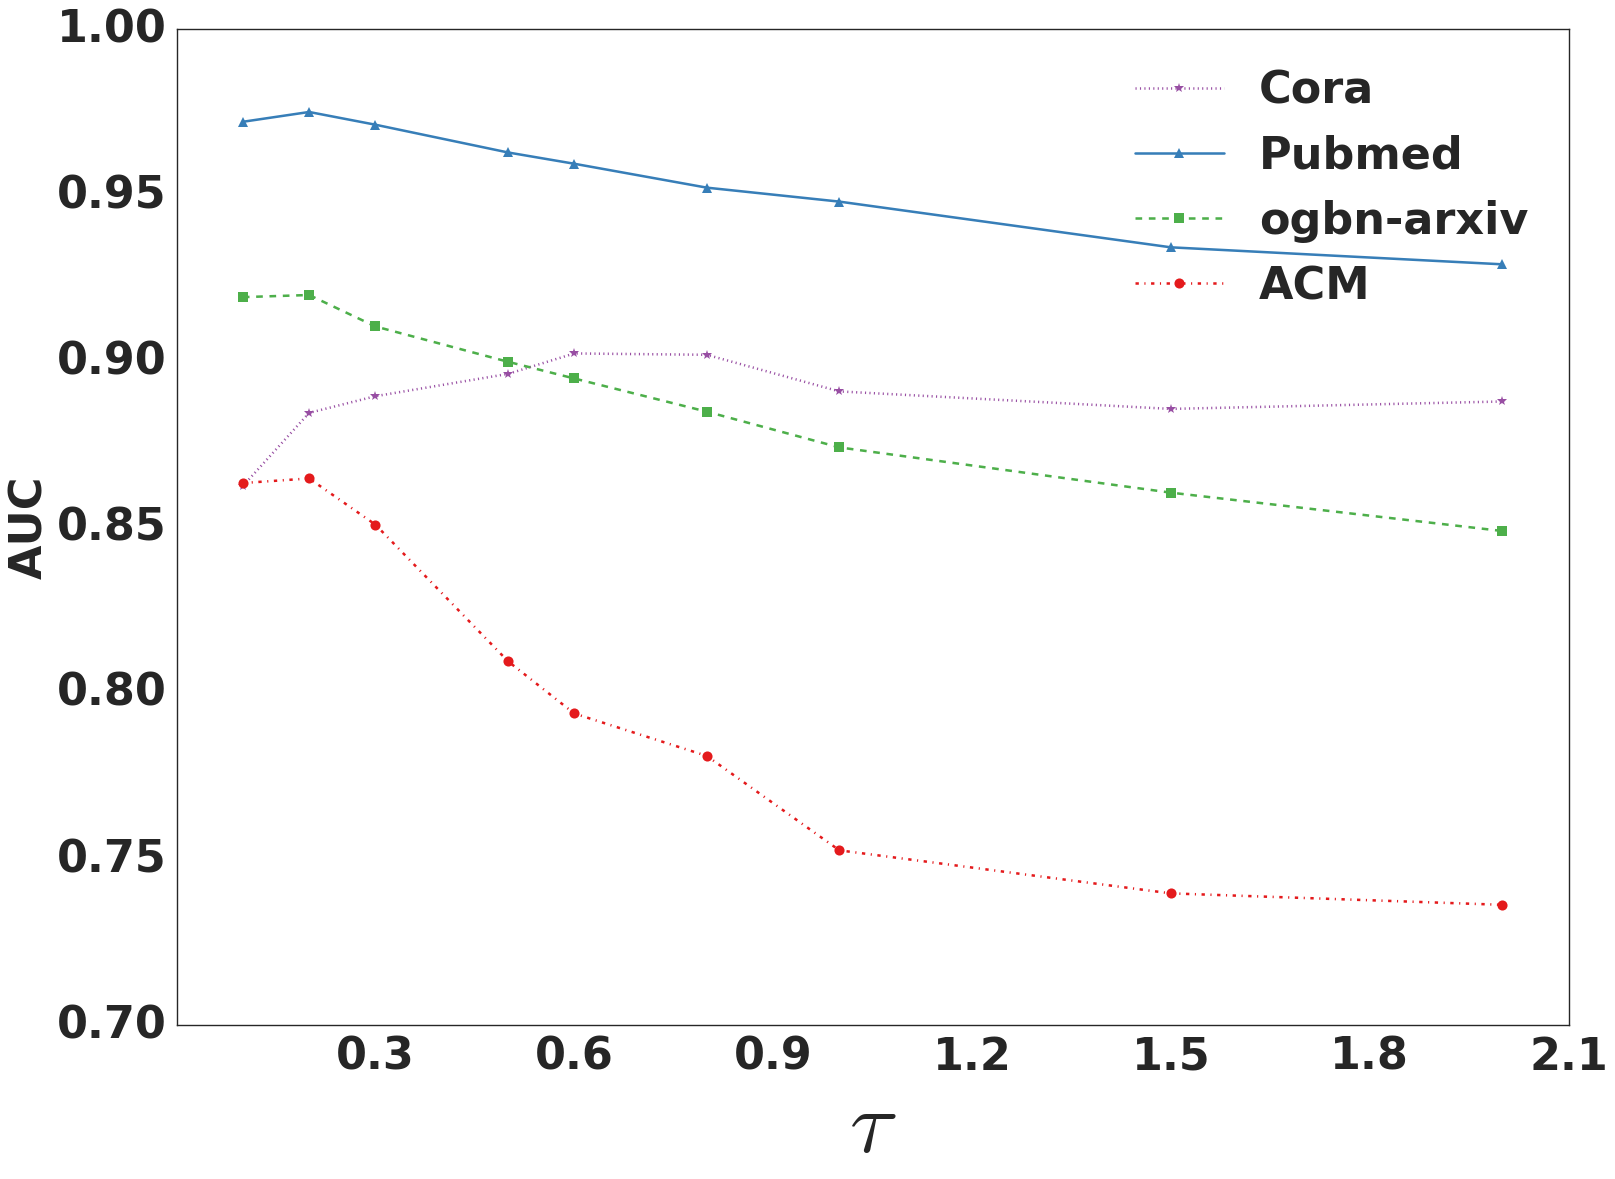

In [39]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
# plt.style.available
for style in ['seaborn-white']:
    fontsize = 40
    pyplot.figure(figsize=(20, 15))
    plt.style.use(style) 
    palette = pyplot.get_cmap('Set1')
    plt.rcParams.update({'font.size': fontsize, 'font.weight':"bold"}) 
    x = tau
    plt.xlim(0, 1)  # 限定横轴的范围
    plt.ylim(0.7, 0.99)  # 限定纵轴的范围

    plt.plot(x, cora_res, color=palette(3), marker='*', linestyle=':',label='Cora')
    plt.plot(x, pub_res, color=palette(1), marker='^', linestyle='-', label='Pubmed')
    plt.plot(x, ogb_res, color=palette(2), marker='s', linestyle='--', label='ogbn-arxiv')
    plt.plot(x, acm_res, color=palette(0), marker='o', linestyle='-.', label='ACM')

    plt.legend()  # 让图例生效
    #plt.xticks(x, names, rotation=1)
    
    plt.margins(0)
    # plt.subplots_adjust(bottom=0.10)
    plt.xlabel(r'$\tau$',fontsize=fontsize*2,fontweight='bold') #X轴标签
    plt.ylabel("AUC",fontsize=fontsize,fontweight='bold') #Y轴标签
    pyplot.yticks([0.70, 0.75,0.80,0.85,0.90, 0.95, 1.0],fontsize=fontsize)
    pyplot.xticks([0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1],fontsize=fontsize)
    #plt.title("A simple plot") #标题
    plt.legend(fontsize=fontsize)
    plt.savefig(f'img/tau{style}.eps',dpi = 1000)
    plt.show()

In [14]:

# plt.rcParams.keys()
# 

In [15]:
help(plt.xlabel)

Help on function xlabel in module matplotlib.pyplot:

xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
    Set the label for the x-axis.
    
    Parameters
    ----------
    xlabel : str
        The label text.
    
    labelpad : float, default: :rc:`axes.labelpad`
        Spacing in points from the Axes bounding box including ticks
        and tick labels.  If None, the previous value is left as is.
    
    loc : {'left', 'center', 'right'}, default: :rc:`xaxis.labellocation`
        The label position. This is a high-level alternative for passing
        parameters *x* and *horizontalalignment*.
    
    Other Parameters
    ----------------
    **kwargs : `.Text` properties
        `.Text` properties control the appearance of the label.
    
    See Also
    --------
    text : Documents the properties supported by `.Text`.

